In [1]:
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
company_name = input("Enter the name of company")

Enter the name of companyMSFT


In [3]:
df = pdr.get_data_tiingo(company_name, api_key = '6893d5ea1530c62591c55ef4b19a16fd4420ba4e')

C:\Users\Aditya\AppData\Local\Temp\ipykernel_24744\49039829.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo(company_name, api_key = '6893d5ea1530c62591c55ef4b19a16fd4420ba4e')


In [4]:
df.to_csv(company_name + '.csv')

In [5]:
df = pd.read_csv(company_name + '.csv')
df
# df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2018-03-26 00:00:00+00:00,93.78,94.00,90.4000,90.61,55031149,88.479269,88.686834,85.290317,85.488447,55031149,0.0,1.0
1,MSFT,2018-03-27 00:00:00+00:00,89.47,95.14,88.5100,94.94,53704562,84.412884,89.762398,83.507146,89.573703,53704562,0.0,1.0
2,MSFT,2018-03-28 00:00:00+00:00,89.39,91.23,88.8700,89.82,52501146,84.337406,86.073403,83.846798,84.743101,52501146,0.0,1.0
3,MSFT,2018-03-29 00:00:00+00:00,91.27,92.29,88.4000,90.18,45867548,86.111142,87.073489,83.403363,85.082752,45867548,0.0,1.0
4,MSFT,2018-04-02 00:00:00+00:00,88.52,90.88,87.5100,90.47,48515417,83.516581,85.743186,82.563669,85.356361,48515417,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,MSFT,2023-03-20 00:00:00+00:00,272.23,277.48,269.8500,276.98,43466649,272.230000,277.480000,269.850000,276.980000,43466649,0.0,1.0
1255,MSFT,2023-03-21 00:00:00+00:00,273.78,275.00,269.5191,274.88,34558704,273.780000,275.000000,269.519100,274.880000,34558704,0.0,1.0
1256,MSFT,2023-03-22 00:00:00+00:00,272.29,281.04,272.1800,273.40,34873330,272.290000,281.040000,272.180000,273.400000,34873330,0.0,1.0
1257,MSFT,2023-03-23 00:00:00+00:00,277.66,281.06,275.2000,277.94,36610879,277.660000,281.060000,275.200000,277.940000,36610879,0.0,1.0


In [6]:
df1 = df.reset_index()['close'] # with closing values
# df2 = df.reset_index()['open'] # with opening values

In [7]:

# df2.head()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_24744\2609594420.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


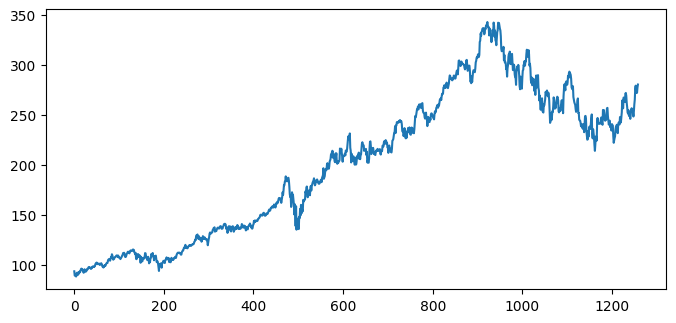

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(df1)

# plt.subplot(2,1,2)
# plt.plot(df2)

In [9]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
# # data_train2, data_test2 = train_test_split(df2, test_size=0.3, random_state=42)
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
train_data

array([[0.02066067],
       [0.00373149],
       [0.00341726],
       [0.01080168],
       [0.        ],
       [0.00467418],
       [0.01496524],
       [0.01516163],
       [0.00671668],
       [0.00883774],
       [0.01712557],
       [0.01311913],
       [0.01987509],
       [0.01791115],
       [0.02219254],
       [0.02965552],
       [0.03110884],
       [0.02981264],
       [0.02545269],
       [0.02682745],
       [0.01806827],
       [0.01488668],
       [0.02254605],
       [0.02867355],
       [0.01963942],
       [0.02545269],
       [0.01960014],
       [0.02179976],
       [0.02608115],
       [0.03024471],
       [0.02863427],
       [0.03307278],
       [0.03688283],
       [0.03605798],
       [0.03735418],
       [0.03456538],
       [0.03389764],
       [0.03008759],
       [0.03079461],
       [0.03566519],
       [0.0352724 ],
       [0.03982874],
       [0.03845398],
       [0.03865038],
       [0.03727562],
       [0.04096783],
       [0.04053576],
       [0.048

In [11]:
def create_dataset(dataset, time_step=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-time_step -1):
        a = dataset[i: i+time_step ,0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
x_train, y_train = create_dataset(train_data,time_step=100)
x_test, y_test = create_dataset(test_data,time_step=100)
# x_train2, y_train2 = create_dataset(data_train2,time_step=100)
# x_test2, y_test2 = create_dataset(data_test2,time_step=100)

In [13]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
# x_train2 = x_train2.reshape(x_train2.shape[0],x_train2.shape[1],1)
# x_test2 = x_test2.reshape(x_test2.shape[0],x_test2.shape[1],1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [15]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [16]:
model.summary()
model.save('dl_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 302ms/step - loss: 0.0360 - val_loss: 0.0352
Epoch 2/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0063 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0025 - val_loss: 0.0036
Epoch 4/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 5/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 6/100
12/12 [==============================] - 3s 236ms/step - loss: 9.4256e-04 - val_loss: 0.0028
Epoch 7/100
12/12 [==============================] - 3s 235ms/step - loss: 8.3776e-04 - val_loss: 0.0027
Epoch 8/100
12/12 [==============================] - 3s 236ms/step - loss: 8.1497e-04 - val_loss: 0.0030
Epoch 9/100
12/12 [==============================] - 3s 235ms/step - loss: 8.3906e-04 - val_loss: 0.0027
Epoch 10/100
12/12 [==============================] - 3s 234ms/step - loss

In [18]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


11/11 [==============================] - 0s 36ms/step


In [19]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [20]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

176.09824889928004

In [21]:
math.sqrt(mean_squared_error(y_test,test_predict))

277.6683340491789

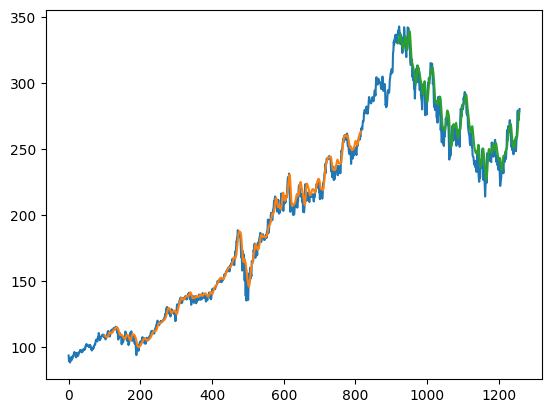

In [22]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
x_input = test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape
len(test_data)

441

In [24]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [25]:
temp_input

[0.5640834282571978,
 0.5485290074237008,
 0.5168309831493774,
 0.4938528614635295,
 0.5218979535724104,
 0.547350642209042,
 0.5512785262579047,
 0.5341529518048627,
 0.60670097018736,
 0.6229231313091637,
 0.6010840959974861,
 0.6027338072980084,
 0.6017911151262814,
 0.6015947209238381,
 0.5997878942613613,
 0.6030480380219174,
 0.6147531324875288,
 0.6247692368121291,
 0.6244157272477315,
 0.6019089516477472,
 0.5962920774578735,
 0.6544640402215325,
 0.6526964923995442,
 0.6539926941356691,
 0.6350602930201499,
 0.6151066420519264,
 0.6121607290152793,
 0.6240622176833339,
 0.6162850072665853,
 0.6441337051730232,
 0.6614556738285087,
 0.6626340390431675,
 0.630386111002003,
 0.6134176519109156,
 0.5967634235437369,
 0.6020660670097018,
 0.6123964020582111,
 0.5878864055933068,
 0.5900074629796928,
 0.5830551082132054,
 0.5735103499744687,
 0.5989630386111,
 0.5942888565929532,
 0.5933461644212261,
 0.5521819395891432,
 0.5255116068973642,
 0.5358026631053852,
 0.5444047291723948,

In [26]:
lst_output = []
n_steps = 100
i = 0
while i<30:
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input,verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

In [27]:
new_days = np.arange(1,101)
pred_days = np.arange(101,131)

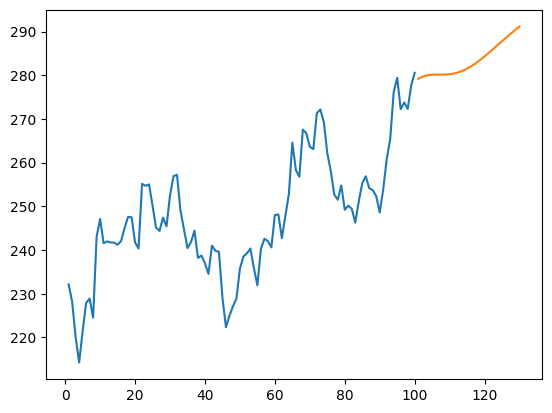

In [28]:
plt.plot(new_days,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(pred_days,scaler.inverse_transform(lst_output))

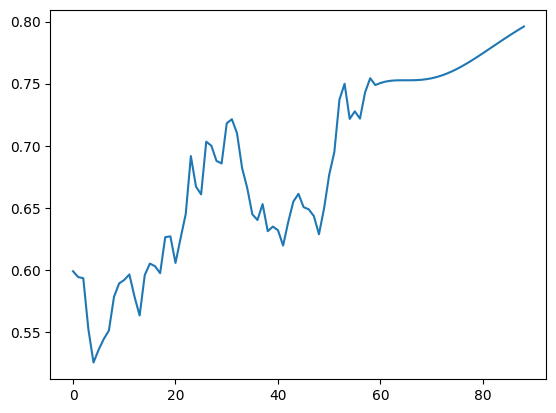

In [29]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

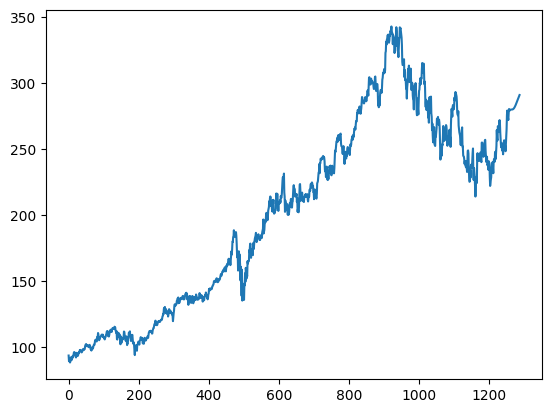

In [30]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)